# Import Library

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fazli Haqqi M Ramadhani


In [11]:
def show_image(title, image, cmap=None):
    plt.figure(figsize=(6, 6))
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

    # Fazli Haqqi M Ramadhani

# Gambar dari File

In [12]:
img_warna = cv2.imread('Gambar WhatsApp 2025-05-02 pukul 15.43.49_7b4180ec.jpg')
img_backlight = cv2.imread('Gambar WhatsApp 2025-05-01 pukul 13.34.19_74669274.jpg')

# Fazli Haqqi M Ramadhani

# Deteksi Warna

In [ ]:
def detect_colors(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Mask Merah
    lower_red1 = np.array([0,100,100])
    upper_red1 = np.array([10,255,255])
    lower_red2 = np.array([160,100,100])
    upper_red2 = np.array([179,255,255])
    mask_red = cv2.inRange(hsv, lower_red1, upper_red1) | cv2.inRange(hsv, lower_red2, upper_red2)

    # Mask hijau
    lower_green = np.array([40,50,50])
    upper_green = np.array([80,255,255])
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Mask biru
    lower_blue = np.array([100,100,100])
    upper_blue = np.array([140,255,255])
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

    # Hasil deteksi
    red = cv2.bitwise_and(image, image, mask=mask_red)
    green = cv2.bitwise_and(image, image, mask=mask_green)
    blue = cv2.bitwise_and(image, image, mask=mask_blue)

    return red, green, blue

red_img, green_img, blue_img = detect_colors(img_warna)

# Fazli Haqqi M Ramadhani

# Tampilkan Hasil

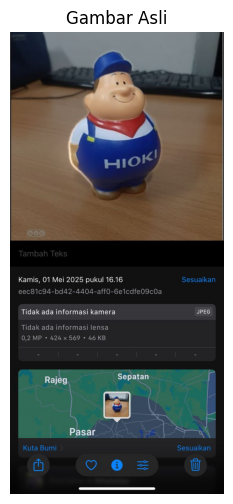

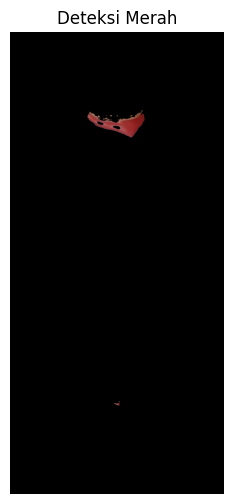

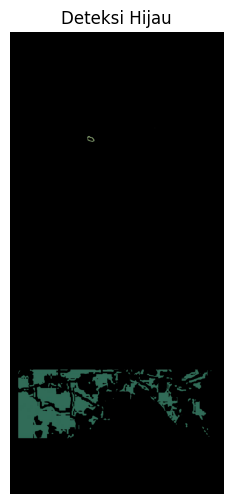

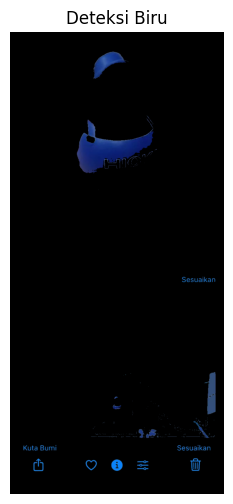

In [14]:
show_image("Gambar Asli", img_warna)
show_image("Deteksi Merah", red_img)
show_image("Deteksi Hijau", green_img)
show_image("Deteksi Biru", blue_img)

# Fazli Haqqi M Ramadhani

# Histogram dan Ambang Batas

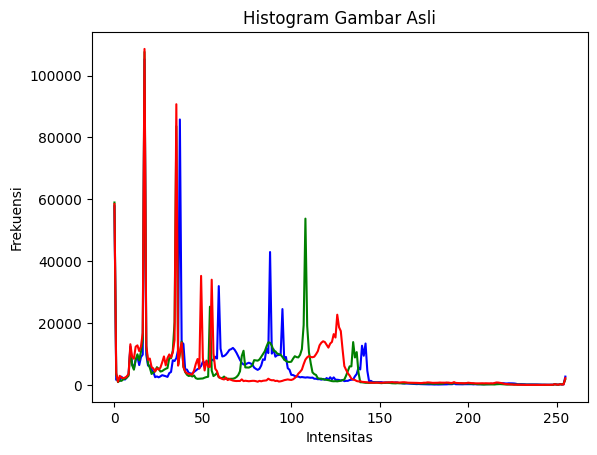

In [15]:
def plot_histogram(image, title='Histogram'):
    color = ('b', 'g', 'r')
    plt.figure()
    plt.title(title)
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0,256])
        plt.plot(hist, color=col)
    plt.xlabel('Intensitas')
    plt.ylabel('Frekuensi')
    plt.show()

plot_histogram(img_warna, "Histogram Gambar Asli")

# Fazli Haqqi M Ramadhani

# Ambang Batas

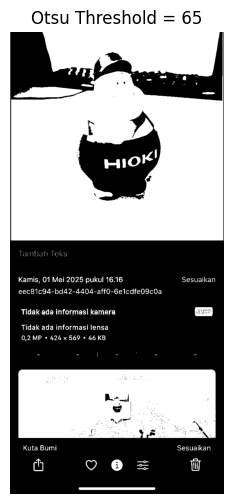

In [16]:
gray_img = cv2.cvtColor(img_warna, cv2.COLOR_BGR2GRAY)
_, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_image(f'Otsu Threshold = {int(_)}', otsu_thresh, cmap='gray')

# Fazli Haqqi M Ramadhani

# Perbaikan Gambar BACKLIGHT

In [17]:
gray_back = cv2.cvtColor(img_backlight, cv2.COLOR_BGR2GRAY)
brightened = cv2.convertScaleAbs(gray_back, alpha=1.2, beta=50)
equalized = cv2.equalizeHist(brightened)

# Fazli Haqqi M Ramadhani

# Tampilan

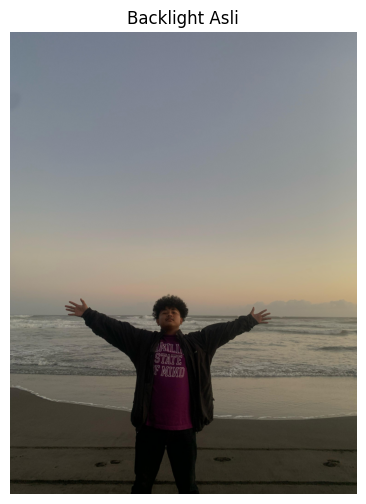

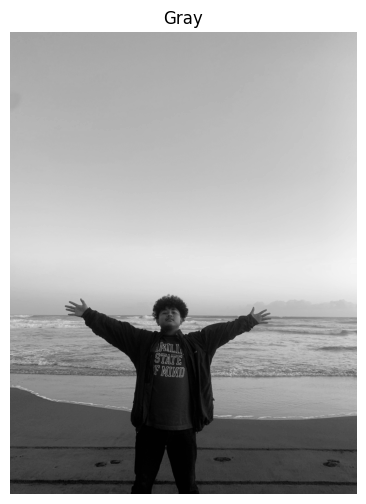

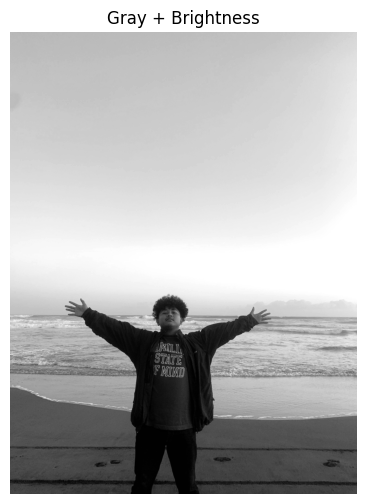

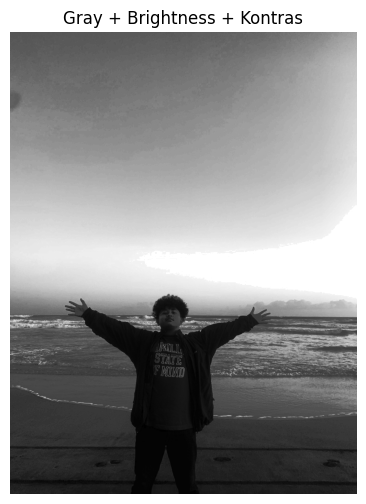

In [18]:
show_image("Backlight Asli", img_backlight)
show_image("Gray", gray_back, cmap='gray')
show_image("Gray + Brightness", brightened, cmap='gray')
show_image("Gray + Brightness + Kontras", equalized, cmap='gray')

# Fazli Haqqi M Ramadhani